In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [288]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
plt.style.use(['ggplot'])

In [ ]:
df = pd.read_csv("/content/drive/My Drive/Deep Learning/Lab1/Admission_Predict.csv",engine='python')
df.columns.values

array(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating',
       'SOP', 'LOR', 'CGPA', 'Research', 'Chance of Admit'], dtype=object)

# Linear Regression With one variable

In [ ]:
df1 = pd.DataFrame(df, columns=[df.columns.values[1]]+[df.columns.values[8]])
df1

,GRE Score,Chance of Admit
0,337,0.92
1,324,0.76
2,316,0.72
3,322,0.80
4,314,0.65
...,...,...
395,324,0.82
396,325,0.84
397,330,0.91
398,312,0.67


## Plotting of Data:

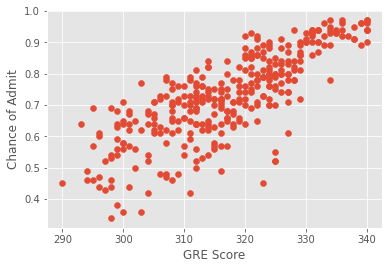

(340, 1) (340, 1)


In [ ]:
X = np.array([df1.values[:340,0]]).T
y = np.array([df1.values[:340,1]]).T
plt.scatter(X,y)
plt.xlabel(df1.columns.values[0])
plt.ylabel(df1.columns.values[1])
plt.show()
print(X.shape, y.shape)

## Gradient Descent:

In [ ]:
def  cal_cost(theta,X,y):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

In [ ]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        prediction = np.dot(X,theta)
        # print(prediction.shape, y.shape)
        # print(np.array(prediction-y).shape)
        # print( X.T.dot((prediction - y)))
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
    return theta, cost_history, theta_history    

In [ ]:
# theta = np.random.randn(2,1)
theta = np.array([[0],[0.1]])
learning_rate = 0.1
iterations = 1000
mean_X = np.sum(X)/len(X)
range_X = max(X)-min(X)
X1 = (X-mean_X)/range_X
X_b = np.c_[np.ones(len(X)),X1]
# print(theta.shape, X_b[0], y[0])
# print("sas",X_b.shape)
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,learning_rate,iterations)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          0.730,
Theta1:          0.482
Final cost/MSE:  418.472


### Convergence graphs

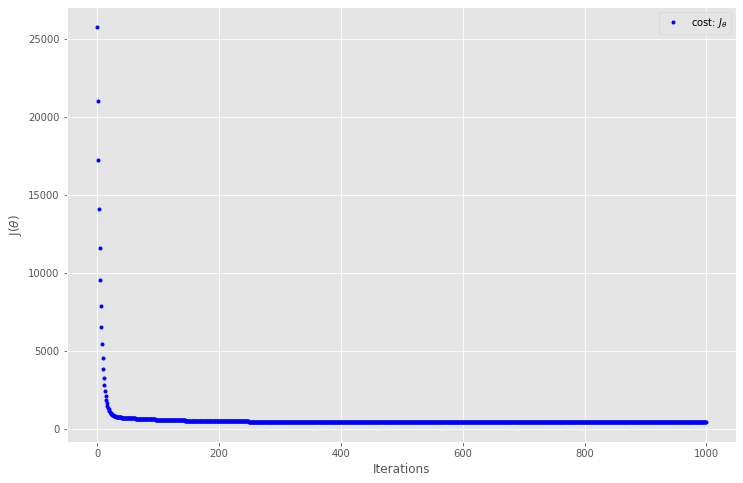

In [ ]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel(r'J($\theta$)')
ax.set_xlabel('Iterations')
_=ax.plot(range(iterations),cost_history,'b.',label=r'cost: $J_\theta$')
ax.legend()

In [ ]:
theta_history[:,1].shape

(1000,)

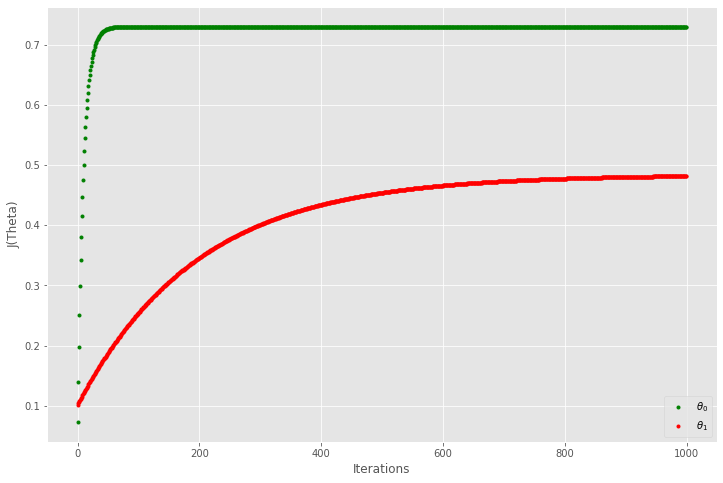

In [ ]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(iterations),theta_history[:,0],'g.',label=r'$\theta_0$')
_=ax.plot(range(iterations),theta_history[:,1],'r.',label=r'${\theta}_1$')
ax.legend()

### Predicting GRE scores

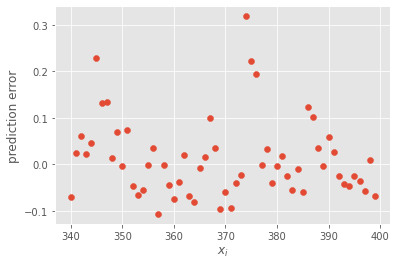

GRE Score :  340
Chance Of Admision :  [0.67976141]  Error :  [-0.07023859]
GRE Score :  390
Chance Of Admision :  [0.6990253]  Error :  [0.0590253]


In [ ]:
X2 = np.array([df1.values[340:,0]]).T
y2 = np.array([df1.values[340:,1]]).T
mean_X2 = np.sum(X2)/len(X2)
X2_fs = (X2-mean_X)/range_X
X2_b = np.c_[np.ones(len(X2_fs)),X2_fs]
y_predict = []
def validation_ds(X,y,theta):
    predict = np.dot(X,theta)
    global y_predict
    y_predict = predict
    diff = (predict - y)
    plt.scatter(np.array(range(len(X)))+340,diff)
    plt.xlabel(r'$x_i$')
    plt.ylabel('prediction error')
    plt.show()

validation_ds(X2_b,y2,theta)
print("GRE Score : ",340)
print("Chance Of Admision : ",y_predict[340-340], " Error : ",y_predict[0]-y2[0])
print("GRE Score : ",390)
print("Chance Of Admision : ",y_predict[390-340], " Error : ",y_predict[50]-y2[50])

# Linear Regression With Multiple Variable

In [ ]:
df1 = pd.DataFrame(df, columns=[df.columns.values[1]]+[df.columns.values[6]]+[df.columns.values[8]])
df1

,GRE Score,CGPA,Chance of Admit
0,337,9.65,0.92
1,324,8.87,0.76
2,316,8.00,0.72
3,322,8.67,0.80
4,314,8.21,0.65
...,...,...,...
395,324,9.04,0.82
396,325,9.11,0.84
397,330,9.45,0.91
398,312,8.78,0.67


## Plotting of Data:

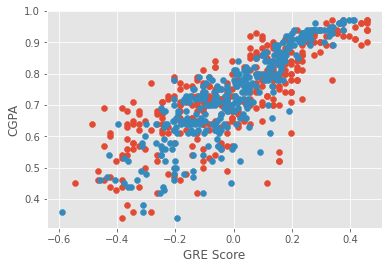

(340, 1) (340, 1)


In [ ]:
X1 = np.array([df1.values[:340,0]]).T
mean_X1 = np.sum(X1)/len(X1)
range_X1 = max(X1)-min(X1)
X1 = (X1-mean_X1)/range_X1

X2 = np.array([df1.values[:340,1]]).T
mean_X2 = np.sum(X2)/len(X2)
range_X2 = max(X2)-min(X2)
X2 = (X2-mean_X2)/range_X2

y = np.array([df1.values[:340,2]]).T
plt.scatter(X1,y)
plt.scatter(X2,y)
plt.xlabel(df1.columns.values[0])
plt.ylabel(df1.columns.values[1])
plt.show()
print(X.shape, y.shape)

## Gradient Descent:

In [ ]:
def  cal_cost(theta,X,y):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

In [ ]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,3))
    for it in range(iterations):
        prediction = np.dot(X,theta)
        # print(prediction.shape, y.shape)
        # print(np.array(prediction-y).shape)
        # print( X.T.dot((prediction - y)))
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
    return theta, cost_history, theta_history    

In [ ]:
# theta = np.random.randn(2,1)
theta = np.array([[0],[0],[0]])
learning_rate = 0.1
iterations = 1000
X_b = np.c_[np.ones(len(X)),X1,X2]
# print(theta.shape, X_b[0], y[0])
# print("sas",X_b.shape)
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,learning_rate,iterations)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f},\nTheta2:          {:0.3f}'.format(theta[0][0],theta[1][0],theta[2][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          0.730,
Theta1:          0.238,
Theta1:          0.383
Final cost/MSE:  270.959


### Convergence graphs

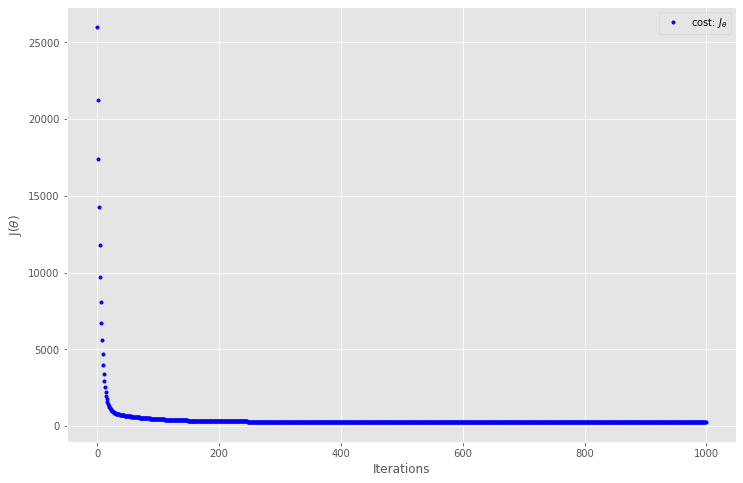

In [ ]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel(r'J($\theta$)')
ax.set_xlabel('Iterations')
_=ax.plot(range(iterations),cost_history,'b.',label=r'cost: $J_\theta$')
ax.legend()

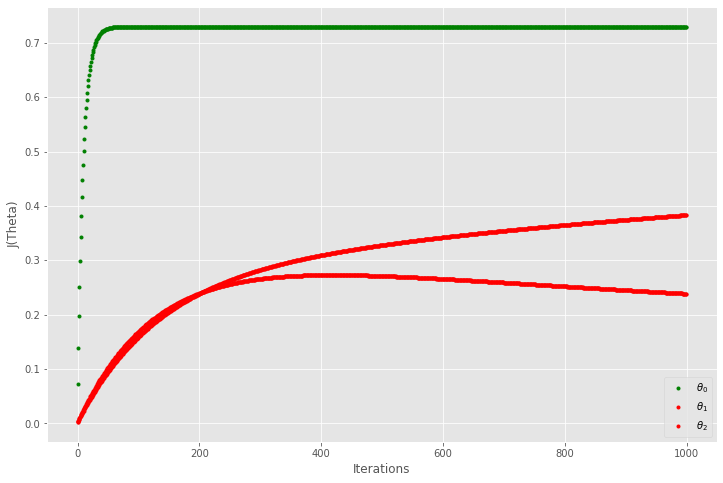

In [ ]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(iterations),theta_history[:,0],'g.',label=r'$\theta_0$')
_=ax.plot(range(iterations),theta_history[:,1],'r.',label=r'${\theta}_1$')
_=ax.plot(range(iterations),theta_history[:,2],'r.',label=r'${\theta}_2$')
ax.legend()

(60, 3)


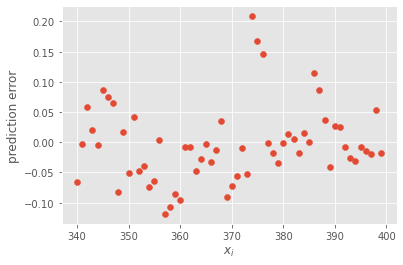

GRE Score :  340
Chance Of Admision :  [0.68387467]  Error :  [-0.06612533]
GRE Score :  390
Chance Of Admision :  [0.66639327]  Error :  [0.02639327]


In [ ]:
X1_p = np.array([df1.values[340:,0]]).T
X1_p = (X1_p - mean_X1)/range_X1

X2_p = np.array([df1.values[340:,1]]).T
X2_p = (X2_p - mean_X2)/range_X2

y_p = np.array([df1.values[340:,2]]).T

X_b = np.c_[np.ones(len(X1_p)),X1_p,X2_p]
print(X_b.shape)
y_predict_2 = []
def validation_ds(X,y,theta):
    predict = np.dot(X,theta)
    global y_predict_2
    y_predict_2 = predict
    diff = (predict - y)
    plt.scatter(np.array(range(len(X)))+340,diff)
    plt.xlabel(r'$x_i$')
    plt.ylabel('prediction error')
    plt.show()

validation_ds(X_b,y_p,theta)
print("GRE Score : ",340)
print("Chance Of Admision : ",y_predict_2[340-340], " Error : ",y_predict_2[0]-y_p[0])
print("GRE Score : ",390)
print("Chance Of Admision : ",y_predict_2[390-340], " Error : ",y_predict_2[50]-y_p[50])

# Logistic Regression

## Loading Data

In [ ]:
data3=pd.read_csv('/content/drive/My Drive/Deep Learning/Lab1/heart.csv')
data3.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data Subset 

In [ ]:
print(data3[['age','thalach','target']])

     age  thalach  target
0     63      150       1
1     37      187       1
2     41      172       1
3     56      178       1
4     57      163       1
..   ...      ...     ...
298   57      123       0
299   45      132       0
300   68      141       0
301   57      115       0
302   57      174       0

[303 rows x 3 columns]


## Data / Feature Normalization

In [ ]:
X=data3[['age','thalach']].values
y=(data3.iloc[:,-1].values).reshape(-1,1)

X=(X-np.mean(X,0))/np.std(X,0)

print(X[:10,:])

[[ 0.9521966   0.01544279]
 [-1.91531289  1.63347147]
 [-1.47415758  0.97751389]
 [ 0.18017482  1.23989692]
 [ 0.29046364  0.58393935]
 [ 0.29046364 -0.07201822]
 [ 0.18017482  0.1466343 ]
 [-1.1432911   1.0212444 ]
 [-0.26098049  0.54020884]
 [ 0.29046364  1.0649749 ]]


## Data Visualization

Text(0.5, 1.0, 'Age vs Thalach')

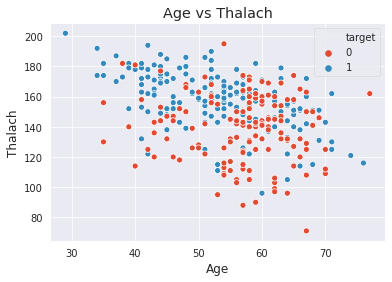

In [ ]:
#plt.figure(figsize=(12,8))
sns.scatterplot(data3['age'],data3['thalach'],hue=data3['target'])
plt.xlabel('Age')
plt.ylabel('Thalach')
plt.title('Age vs Thalach')

## Train - Test Data Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train=np.append(np.ones([len(X_train),1]),X_train,axis = 1)
X_test=np.append(np.ones([len(X_test),1]),X_test,axis = 1)

## Gradient Descent , Cost Function and Predict Function

In [ ]:
def logreg_cost(theta,x,y):                                
    m,n = x.shape
    cost = -(1 / m) * np.sum((y * np.log((1/(1+np.exp(-x.dot(theta)))))) + ((1 - y) * np.log(1-(1/(1+np.exp(-x.dot(theta)))))))
    return cost

def Gradient_Descent3(iterations,alpha,X_train,y_train):
    n,f = X_train.shape # of Rows and Features
    theta = np.zeros((f,1))
    history3=[]
    for i in range(iterations):
        grad=(1 / n) * np.dot(X_train.T, (1/(1+np.exp(-(X_train.dot(theta))))) - y_train)
        
        cost=logreg_cost(theta,X_train,y_train)

        theta = theta - (alpha*(grad)/len(X_train))
        
        history3.append(([cost]+list(theta.flatten())))
        
    return history3

def predict(data,theta):
    y_hat=1/(1+np.exp(-(np.dot(data,theta))))
    
    y_hat=[1 if i > 0.5 else 0 for i in y_hat]
    
    return y_hat


## Epochs and Optimal Theta Values

In [ ]:
# Parameters
iterations = 300
alpha = 0.01


history3= Gradient_Descent3(iterations,alpha,X_train,y_train)


theta=history3[-1][1:]
print('Optimal Cost')
print(history3[-1][0])
print('Optimal Values for theta0,theta1 and theta2')
print(theta)

Optimal Cost
0.6923773926317269
Optimal Values for theta0,theta1 and theta2
[0.0005995753564405086, -0.001594773158020073, 0.002833153476409542]


## Convergence Graph

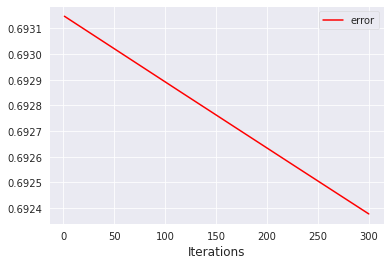

In [ ]:
plt.plot(np.linspace(1,300,300),np.array(history3)[:,0],color='r')
plt.xlabel('Iterations')
plt.legend(['error','m1','m2'])

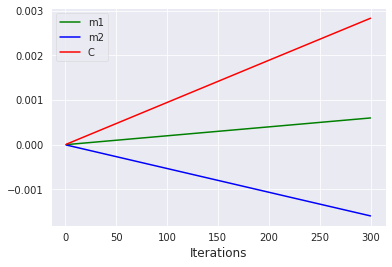

In [ ]:
plt.plot(np.linspace(1,300,300),np.array(history3)[:,1],color='g',label='m1')
plt.plot(np.linspace(1,300,300),np.array(history3)[:,2],color='b',label='m2')
plt.plot(np.linspace(1,300,300),np.array(history3)[:,3],color='r',label='m2')
plt.xlabel('Iterations')
plt.legend(['m1','m2','C'])

## Model Performance on Training and Testing Data

In [ ]:
from sklearn.metrics import accuracy_score

y_pred1 = predict(X_train,theta)
score1=accuracy_score(y_train,y_pred1)
print('Training Accuracy :',score1)

y_pred2 = predict(X_test,theta)
score2=accuracy_score(y_test,y_pred2)
print('Testing Accuracy :',score2)

Training Accuracy : 0.6745283018867925
Testing Accuracy : 0.7142857142857143


## Comparison with in-built Logistic Regression function

In [ ]:
from sklearn.linear_model import LogisticRegression 

classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_train, y_train) 

y_pred = classifier.predict(X_train)
print('Training Accuracy :',accuracy_score(y_train,y_pred))

y_pred = classifier.predict(X_test)
print('Testing Accuracy :',accuracy_score(y_test,y_pred))

Training Accuracy : 0.6933962264150944
Testing Accuracy : 0.7032967032967034


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)




---
---





